# Analyse du cas R-S et graphiques 2D

L'objectif de cet exemple est de présenter le cas R-S. Nous présentons également des éléments graphiques pour la visualisation de la surface d'état limite en 2 dimensions.

In [1]:
import openturns as ot
import numpy as np
import otbenchmark as otb

In [2]:
problem = otb.RminusSReliability()

In [3]:
event = problem.getEvent()
g = event.getFunction()

In [4]:
problem.getProbability()

0.07864960352514257

In [5]:
# Create the Monte-Carlo algorithm
algoProb = ot.ProbabilitySimulationAlgorithm(event)
algoProb.setMaximumOuterSampling(1000)
algoProb.setMaximumCoefficientOfVariation(0.01)
algoProb.run()

In [6]:
# Get the results
resultAlgo = algoProb.getResult()
neval = g.getEvaluationCallsNumber()
print("Number of function calls = %d" % (neval))
pf = resultAlgo.getProbabilityEstimate()
print("Failure Probability = %.4f" % (pf))
level = 0.95
c95 = resultAlgo.getConfidenceLength(level)
pmin = pf - 0.5 * c95
pmax = pf + 0.5 * c95
print("%.1f %% confidence interval :[%.4f,%.4f] " % (level * 100, pmin, pmax))

Number of function calls = 1000
Failure Probability = 0.0910
95.0 % confidence interval :[0.0732,0.1088] 


## Plot the contours of the function

In [7]:
inputVector = event.getAntecedent()
distribution = inputVector.getDistribution()

In [8]:
R = distribution.getMarginal(0)
S = distribution.getMarginal(0)

In [9]:
alphaMin = 0.01
alphaMax = 1 - alphaMin
lowerBound = ot.Point([R.computeQuantile(alphaMin)[0], S.computeQuantile(alphaMin)[0]])
upperBound = ot.Point([R.computeQuantile(alphaMax)[0], S.computeQuantile(alphaMax)[0]])

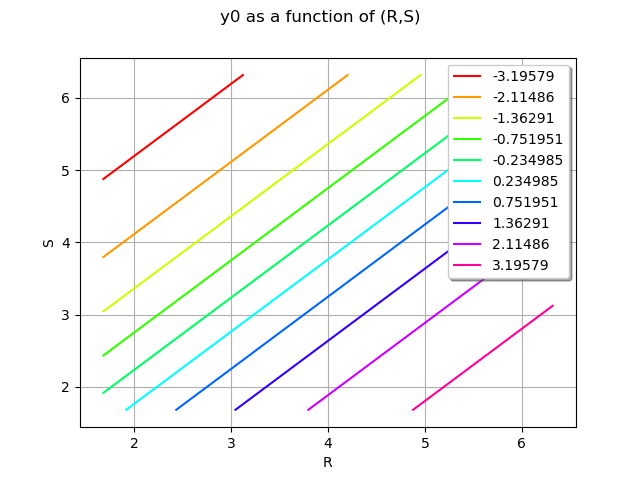

In [10]:
nbPoints = [100, 100]
g.draw(lowerBound, upperBound, nbPoints)

In [11]:
Y = R - S
Y

class=Normal name=Normal dimension=1 mean=class=Point name=Unnamed dimension=1 values=[0] sigma=class=Point name=Unnamed dimension=1 values=[1.41421] correlationMatrix=class=CorrelationMatrix dimension=1 implementation=class=MatrixImplementation name=Unnamed rows=1 columns=1 values=[1]

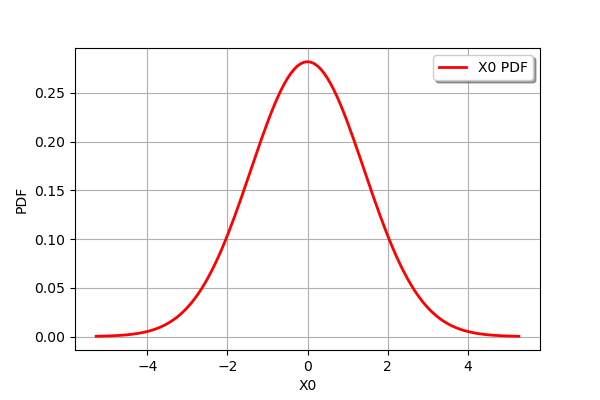

In [12]:
Y.drawPDF()

## Print the iso-values of the distribution

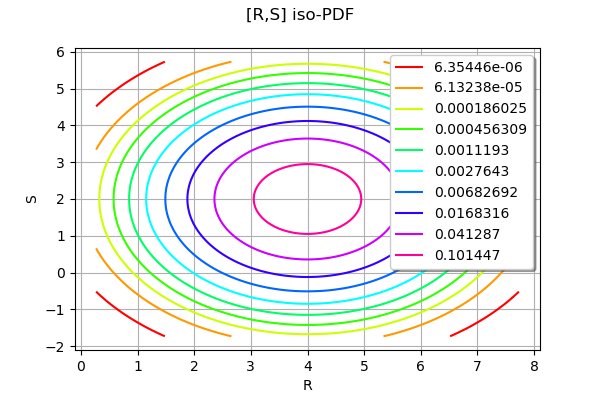

In [13]:
distribution.drawPDF()

## Visualise the safe and unsafe regions on a sample

In [14]:
sampleSize = 500

In [15]:
sampleInput = inputVector.getSample(sampleSize)
sampleInput[:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=2 description=[R,S] data=[[3.96561,1.16024],[3.43536,1.81818],[3.36561,1.18217],[4.38736,2.44405],[2.96848,3.23419]]

In [16]:
sampleOutput = g(sampleInput)

In [17]:
drawEvent = otb.DrawEvent(event)

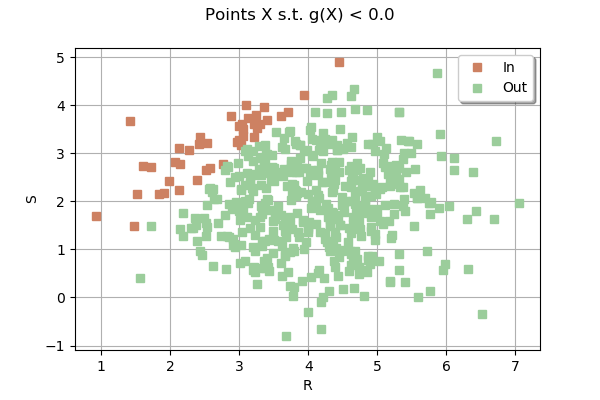

In [18]:
cloud = drawEvent.drawSample(sampleInput, sampleOutput)
cloud

## Draw the limit state surface

In [19]:
bounds = ot.Interval(lowerBound, upperBound)
bounds

class=Interval name=Unnamed dimension=2 lower bound=class=Point name=Unnamed dimension=2 values=[1.67365,1.67365] upper bound=class=Point name=Unnamed dimension=2 values=[6.32635,6.32635] finite lower bound=[1,1] finite upper bound=[1,1]

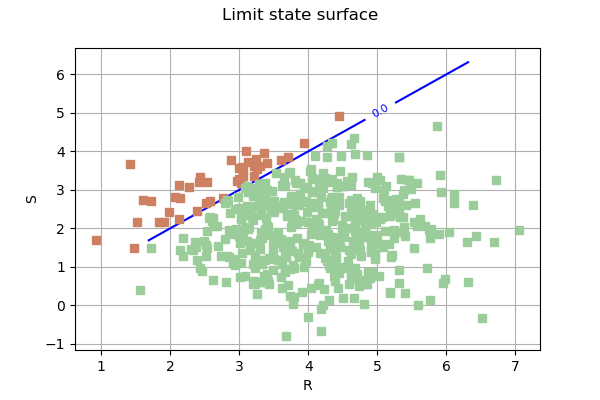

In [20]:
nX = 75
nY = 75
graph = drawEvent.drawLimitState(bounds, nX, nY)
graph.add(cloud)
graph

## Fill the event domain with a color

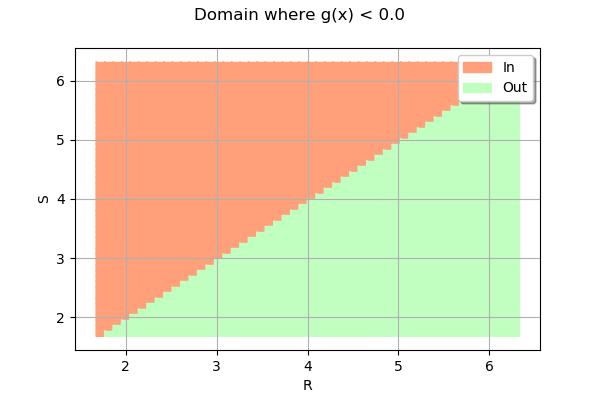

In [21]:
domain = drawEvent.fillEvent(bounds)
domain

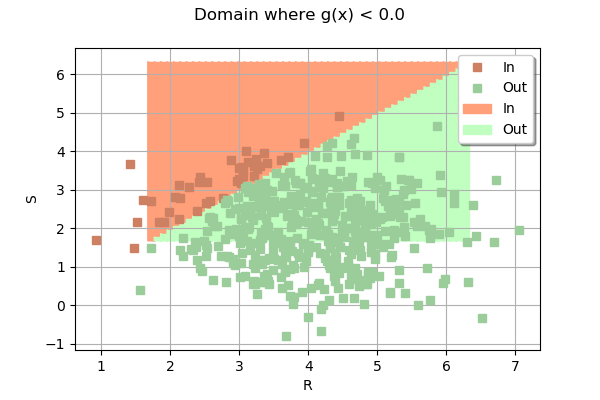

In [22]:
domain.add(cloud)
domain